# Comparison between Exact EM Inversion 1D with empymod and LIN approximation

In [219]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

### Exercise for three layers. 
Calculate 5 parameters:
- 3 resistivities
- 2 thicknesses

Define coil configurations

In [220]:
# Receivers geometry

offsets = np.array([2, 4, 8]) # in meters
dip = np.array([0, 90])

#Hreceivers = [offsets, offsets*0, 0, 0, 0]
#Vreceivers = [offsets, offsets*0, 0, 0, 90]

receiver = [offsets, offsets*0, 0, 0, 90]

# Source geometry

#Hsource = [0, 0, 0 ,0 , 0]
#Vsource = [0, 0, 0, 0, 90]

source = [0, 0, 0, 0, 90]
depth = [0, 3, 6]
res = [2e14, 10, 10, 10]

# Frequency

freq = 9000

In [417]:
# Define parameters:
freq = 9000 #Hz
mu_0 = 4 * np.pi * 1e-7 # check this value
s = 8 # coil separation
source = [0, 0, 0, 0, 90]
receiver = [s, s*0, 0, 0, 90]
depth = [0]


In [418]:
# Define skin factor
sigma = 150/1000
delta = np.sqrt(2/(2 * np.pi * freq * mu_0 * sigma))
print('skin factor is: ', delta)

# Define dimensionless induction number Nb

Nb = sigma / delta
print('Nb is: ', Nb)

skin factor is:  13.697876534699995
Nb is:  0.010950602425128752


## Define forward functions

In [432]:
def Q_Full(src, rec, depth, res, freq):
    res = [2e14] + res
    Hs = empymod.loop(src, rec, depth, res, freq, xdirect=None, mrec = 'loop', verb=0)
    H = empymod.loop(src, rec, depth, res, freq, mrec = 'loop', verb=0)
    Hp = H - Hs
    Q = np.imag(Hs/Hp)
    P = np.real(Hs/Hp)
    
    return Q, P

Low Induction Number approximation

$(\frac{Hs}{Hp}) = \frac{\omega \mu_0 s^2 \sigma}{4}$

LIN Approximation

$\sigma_a = 4 * Q /(\omega * \mu_0 * s^2)$

- $\sigma_a$   -> Apparent Conductivity
- $\sigma$ -> True conductivity
- $Q$     -> Quadrature
- $\omega$ -> angular frequency
- $\mu_0$ -> magnetic permeability
- $s$     -> coil sepparation

In [426]:
def ECa_LIN(Q, freq, mu_0, s):
    ECa = 4 * Q / ((2 * np.pi * freq) * mu_0 * s**2)
    return ECa

def Q_LIN(ECa, freq, mu_0, s):
    Q = ECa * (2 * np.pi * freq) * mu_0 * s**2 / 4
    return Q

In [427]:
sigma_arr = np.linspace(1/1000, 150/1000) 
res_arr = 1/sigma_arr
Q_arr = []
P_arr = []
#plt.figure()
for res in res_arr:
    Q, P = Q_Full(source, receiver, depth, res, freq)
    #plt.plot(sigma, Q_Full_t, 'ob')
    Q_arr.append(Q)
    P_arr.append(P)

Text(0.5, 0, 'In Phase')

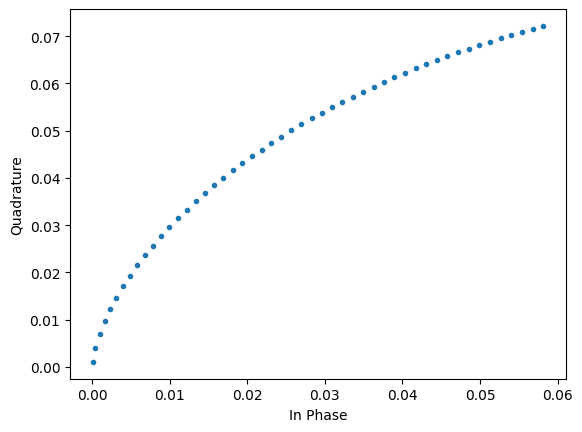

In [428]:
plt.plot(P_arr, Q_arr, '.')
plt.ylabel('Quadrature')
plt.xlabel('In Phase')

In [429]:
sigma_est = []
#plt.figure()
for Q in Q_arr:
    sigma_est.append(ECa_LIN(Q, freq, mu_0, s))
    #plt.plot(sigma, sigma_est)
    

Text(0.5, 1.0, 'VCP Coil separation: 8m')

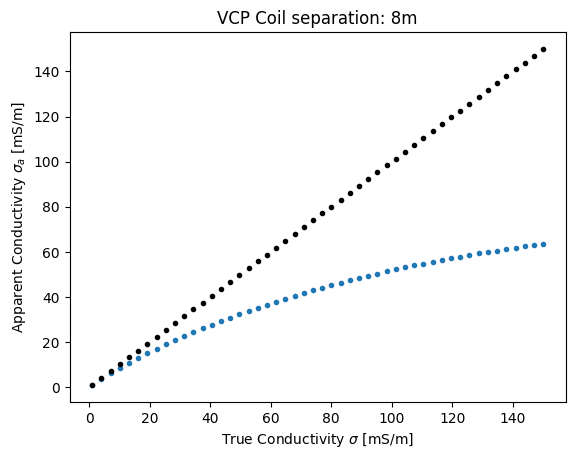

In [430]:
plt.plot(sigma_arr*1000, np.array(sigma_est)*1000, '.')
plt.plot(sigma_arr*1000, sigma_arr*1000, '.k')
plt.xlabel('True Conductivity $\sigma$ [mS/m]')
plt.ylabel('Apparent Conductivity $\sigma_a$ [mS/m]')
plt.title('VCP Coil separation: ' + str(s) + 'm')

In [434]:
# Inversion LIN Approach

# Create 3 layered model

# Define parameters:
freq = 9000 #Hz
mu_0 = 4 * np.pi * 1e-7 # check this value
s = 8 # coil separation
source = [0, 0, 0, 0, 90]
receiver = [s, s*0, 0, 0, 90]
depth = [0, 3, 7]
sigma = [10/1000, 20/1000, 50/1000] # siemens
res = [1/sigma[0], 1/sigma[1], 1/sigma[2]]

In [435]:
# Forward model receiver quadrature read
Q, P = Q_Full(source, receiver, depth, res, freq)

In [437]:
ECa = ECa_LIN(Q, freq, mu_0, s)